# Molecular Visualization using RDkit & CheMBL DB data preprocessing

구글 코랩 기준 라이브러리 설치가 진행됩니다. 실제로 설치하는 방법은 다릅니다.
로컬에서 설치 할 시 설치할 라이브러리의 버전을 적어 놓겠습니다.
* python==3.6
* deepchem==2.3.0
* Rdkit==1.16
* chembl_webresource_client==0.10.2


In [ ]:
# RDkit 설치, 2~3분 소요 예상
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge python=3.6
!time conda install -q -y -c conda-forge rdkit

--2020-10-05 23:24:32--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-10-05 23:24:32--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93052469 (89M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  88.74M   199MB/s    in 0.4s    

2020-10-05 23:24:33 (199 MB/s) - ‘Miniconda3-latest-Linux

In [ ]:
#Chembl DB에서 데이터를 가져올 수 있는 라이브러리 설치
!pip install chembl_webresource_client

     |████████████████████████████████| 51 kB 390 kB/s 
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.2-py3-none-any.whl size=55661 sha256=3ae21345fc4c59e0a2e3bb94b6ebd9529340b85d18a7a3b058826ce5120140a9
  Stored in directory: /root/.cache/pip/wheels/21/8c/3d/62f69d35e4b72cf761eff44234bbe2dcef1c615d4032dee84e
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6350 sha256=29b043037070843472acf50fc8e88a5e33b25a210434bf643515abb3121637d2
  Stored in directory: /root/.cache/pip/wheels/5d/79/e4/4e55effe206295359b37e0f9db3e68a1197ba396682807dadb
Successfully built chembl-webresource-client easydict


In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')
#필요한 라이브러리 import 과정 
from rdkit import Chem
#rdkit으로 얻은 mol object를 시각화하기위한 라이브러리와 노트북에 시각화하는 메소드가 담긴 라이브러리 
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
#Mol object에 기반하여 표현자를 만들어 주는 메소드가 담긴 라이브러리
from rdkit.Chem import Descriptors
#이하 데이터로드 및 여러가지 메소드가 담긴 라이브러리 
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

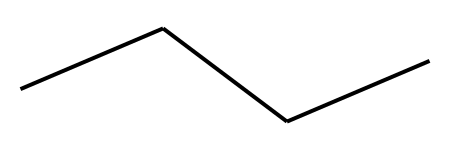

In [ ]:
mol = Chem.MolFromSmiles('CCCC')
mol

http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html

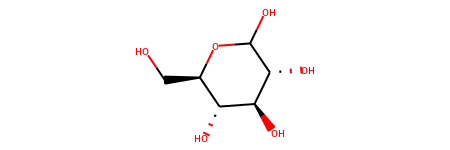

In [ ]:
mol = Chem.MolFromSmiles("OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O")
mol

<https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html>

In [ ]:
from rdkit.Chem import Descriptors
mw = Descriptors.MolWt(mol)
mw

180.156

ex) 포도당(C6H12O6)=12.01x6+1.01x12+16.00x6=180.16

## 분자량 출력

In [ ]:
mw = Descriptors.MolWt(mol)
mw

180.156

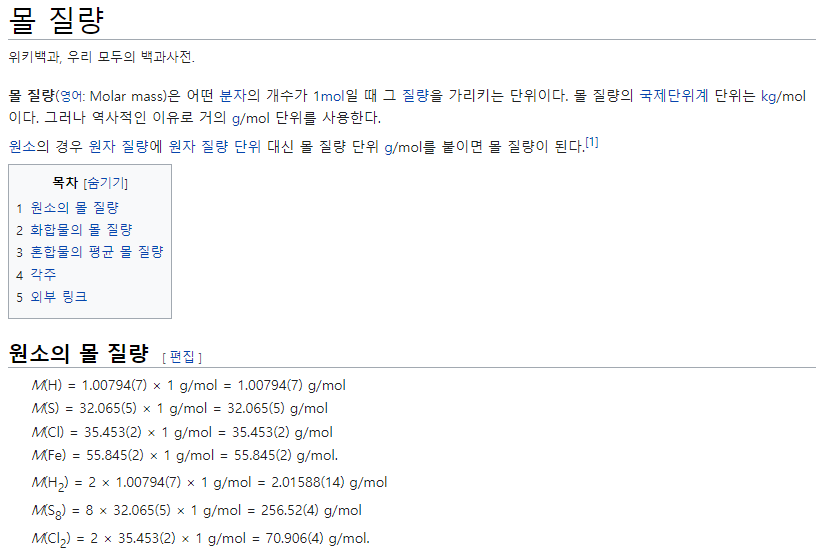

## 하위구조 매칭(Substructure Match)

몇가지 분자에 대하여 SMILES를 얻고 부분 패턴을 찾는 방법을 알아봅시다.

Glycine WIKI : https://en.wikipedia.org/wiki/Glycine#:~:text=Glycine%20

Glycine SMILES : 'C(C(=O)O)N'

Phenylalanine SMILES : 'N[C@@H](CC1=CC=CC=C1)C(O)=O'

Histidine SMILES : 'O=C([C@H](CC1=CNC=N1)N)O'

Cysteine SMILES: 'C([C@@H](C(=O)O)N)S'

In [ ]:
smiles_list = ['C(C(=O)O)N', 'N[C@@H](CC1=CC=CC=C1)C(O)=O', 'O=C([C@H](CC1=CNC=N1)N)O', 'C([C@@H](C(=O)O)N)S']

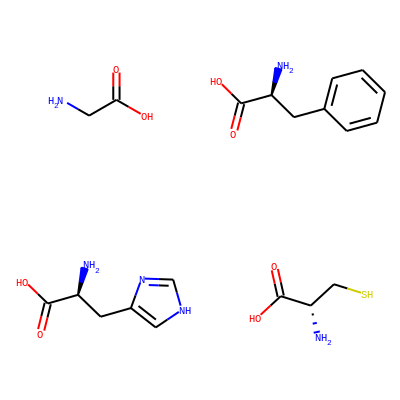

In [ ]:
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)
img  = Draw.MolsToGridImage(mol_list, molsPerRow=2)
img

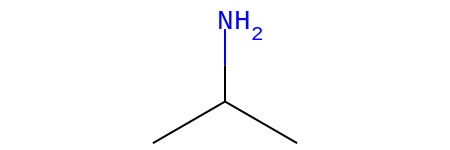

In [ ]:
#찾고자하는 하위 구조
Chem.MolFromSmiles('CC(N)C')

In [ ]:
pattern = Chem.MolFromSmiles('S')
#pattern = Chem.MolFromSmiles('C(=O)O')
#pattern = Chem.MolFromSmiles('CC(N)C')
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
False
False
True


((3, 4, 5), (8, 9, 7))


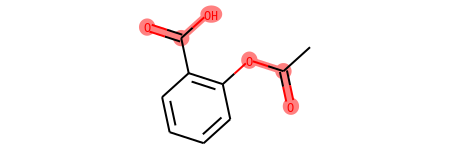

In [ ]:
mol= Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
pattern = Chem.MolFromSmarts('C(=O)O')
print(mol.GetSubstructMatches(pattern))
mol

## 고리(Ring)찾기
SMARTS : https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html

In [ ]:
 pattern = Chem.MolFromSmarts('[r6]')
 for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
True
False
False


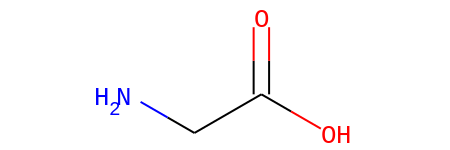

In [ ]:
glycine = mol_list[0]
glycine

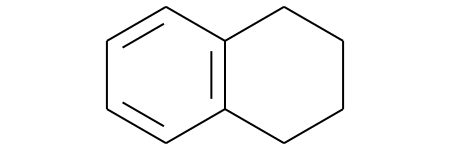

In [ ]:
mol = Chem.MolFromSmiles('c1cccc2c1CCCC2')
mol.GetNumAtoms()
mol


In [ ]:
#pattern = Chem.MolFromSmarts('[r5]')
pattern = Chem.MolFromSmarts('[r6]')
print(mol.HasSubstructMatch(pattern))

True


In [ ]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

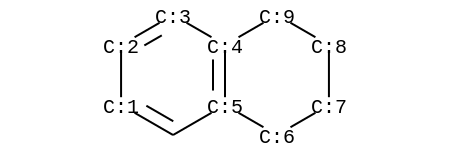

In [ ]:
mol_with_atom_index(mol)

In [ ]:
ri = mol.GetRingInfo()
print(ri.AtomRings())
print(ri.NumRings())

((0, 5, 4, 3, 2, 1), (6, 7, 8, 9, 4, 5))
2


In [ ]:
print(ri.BondRings())

((9, 4, 3, 2, 1, 0), (6, 7, 8, 10, 4, 5))


In [ ]:
def isRingAromatic(mol, bondRing):
  for i in bondRing:
    if not mol.GetBondWithIdx(i).GetIsAromatic():
      return False
    return True

In [ ]:
print(isRingAromatic(mol, ri.BondRings()[0]))

True


In [ ]:
print(isRingAromatic(mol, ri.BondRings()[1]))

False


##Without Implicit Hydrogens

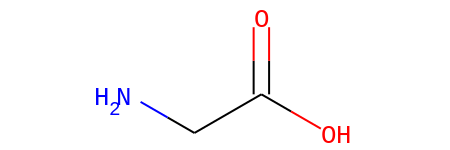

In [ ]:
glycine

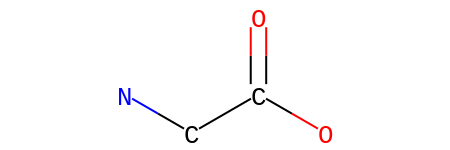

In [ ]:
for atom in glycine.GetAtoms():
  atom.SetProp("atomLabel", atom.GetSymbol())
glycine

## RDkit을 사용한 FingerPrint생성 방법

In [ ]:
fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
np.nonzero(fp_arr)

(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)

In [ ]:
bi= {}
fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
np.nonzero(fp_arr)

(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)

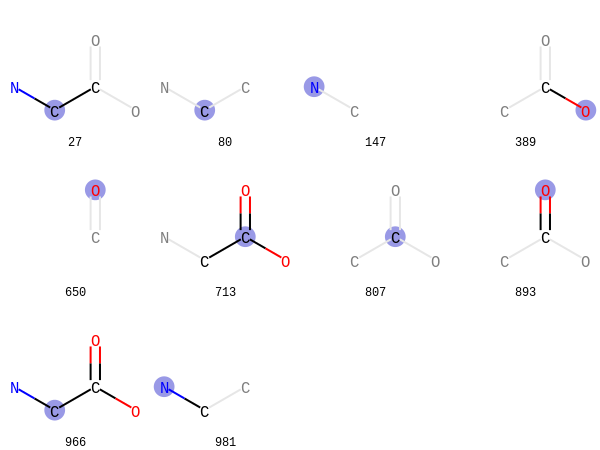

In [ ]:
prints = [(glycine, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow=4, legends = [str(x) for x in fp.GetOnBits()])

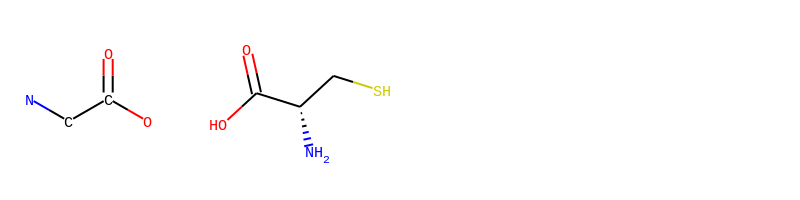

In [ ]:
cysteine = mol_list[3]
img = Draw.MolsToGridImage([glycine, cysteine], molsPerRow=4)
img

## 두 분자사이의 유사도 비교(TanimotoSimilarity)

In [ ]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(cysteine, 2, nBits=1024, bitInfo=bi)
print('cysteine',list(fp2.GetOnBits()))
print('glycine',list(fp.GetOnBits()))

cysteine [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
glycine [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]


In [ ]:
common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
combined = set(fp2.GetOnBits()) | set(fp.GetOnBits())
#&&
print(common)
#||
print(combined)
#유사성  전체 원소 대비 얼마나 많은 공통부분을 가지고 있는지 Metrics
print(len(common)/len(combined))
print(DataStructs.TanimotoSimilarity(fp, fp2))

{389, 807, 650, 80, 147, 893}
{1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}
0.3
0.3


# 외부데이터 가져오고 정제하기(CheMBL DB)



ChEMBL DB Link: <https://www.ebi.ac.uk/chembl/>

In [ ]:
#데이터프레임 구성을 위한 pandas
import pandas as pd
#chembl DB에서 데이터를 가져오기위한 라이브러리
from chembl_webresource_client.new_client import new_client

In [ ]:
#Coronavirus에 대한 검색 결과를 쿼리 후 데이터 프레임으로 가져오기
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,5.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859


In [ ]:
#4번째 인덱스에 있는 Single Protein타입의 CHEMBL3927에 관심이 있다고 가정
wanted_target = targets.target_chembl_id[4]
wanted_target

'CHEMBL3927'

In [ ]:
activity = new_client.activity
resource = activity.filter(target_chembl_id = wanted_target).filter(standard_type="IC50")
data=pd.DataFrame.from_dict(resource)
#.T명령어를 사용하여 데이터모양을 전치
data.head(5).T

,0,1,2,3,4
activity_comment,None,None,None,None,None
activity_id,1480935,1480936,1481061,1481065,1481066
activity_properties,[],[],[],[],[]
assay_chembl_id,CHEMBL829584,CHEMBL829584,CHEMBL830868,CHEMBL829584,CHEMBL829584
assay_description,In vitro inhibitory concentration against SARS...,In vitro inhibitory concentration against SARS...,In vitro inhibitory concentration against SARS...,In vitro inhibitory concentration against SARS...,In vitro inhibitory concentration against SARS...
assay_type,B,B,B,B,B
bao_endpoint,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190,BAO_0000190
bao_format,BAO_0000357,BAO_0000357,BAO_0000357,BAO_0000357,BAO_0000357
bao_label,single protein format,single protein format,single protein format,single protein format,single protein format
canonical_smiles,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]


## 결측치 처리

In [ ]:
#결측치 데이터 제거 axis=0 행, axis=1 열
data= data.dropna(axis=1)
data.head(5)

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,document_journal,document_year,molecule_chembl_id,parent_molecule_chembl_id,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_type,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,uo_units,value
0,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,CHEMBL187579,CHEMBL187579,False,http://www.openphacts.org/units/Nanomolar,384103,=,1,True,=,IC50,nM,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,7.2
1,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,CHEMBL188487,CHEMBL188487,False,http://www.openphacts.org/units/Nanomolar,383984,=,1,True,=,IC50,nM,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,9.4
2,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,CHEMBL185698,CHEMBL185698,False,http://www.openphacts.org/units/Nanomolar,384106,=,1,True,=,IC50,nM,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,13.5
3,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,CHEMBL426082,CHEMBL426082,False,http://www.openphacts.org/units/Nanomolar,384075,=,1,True,=,IC50,nM,13110.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,13.11
4,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,CHEMBL187717,CHEMBL187717,False,http://www.openphacts.org/units/Nanomolar,384234,=,1,True,=,IC50,nM,2000.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,2.0


## 타겟변수 클래스화

In [ ]:
#범주형 변수화
bioactivity_class = []
for i in data.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [ ]:
data['activity']=bioactivity_class

In [ ]:
data.head(5)

,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,document_journal,document_year,molecule_chembl_id,parent_molecule_chembl_id,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_type,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,uo_units,value,activity
0,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,CHEMBL187579,CHEMBL187579,False,http://www.openphacts.org/units/Nanomolar,384103,=,1,True,=,IC50,nM,7200.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,7.2,intermediate
1,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,CHEMBL188487,CHEMBL188487,False,http://www.openphacts.org/units/Nanomolar,383984,=,1,True,=,IC50,nM,9400.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,9.4,intermediate
2,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,CHEMBL185698,CHEMBL185698,False,http://www.openphacts.org/units/Nanomolar,384106,=,1,True,=,IC50,nM,13500.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,13.5,inactive
3,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,CHEMBL426082,CHEMBL426082,False,http://www.openphacts.org/units/Nanomolar,384075,=,1,True,=,IC50,nM,13110.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,13.11,inactive
4,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,CHEMBL187717,CHEMBL187717,False,http://www.openphacts.org/units/Nanomolar,384234,=,1,True,=,IC50,nM,2000.0,CHEMBL3927,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,IC50,UO_0000065,2.0,intermediate


In [ ]:
mol_cid = []
for i in data.molecule_chembl_id:
  mol_cid.append(i)
canonical_smiles = []
for i in data.canonical_smiles:
  canonical_smiles.append(i)
standard_value = []
for i in data.standard_value:
  standard_value.append(i)

In [ ]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
data2 = pd.DataFrame( data_tuples,  columns=['molecule_id', 'smiles','bioactivity', 'standard_value'])

In [ ]:
data2.head(5)

,molecule_id,smiles,bioactivity,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0


In [ ]:
selection = ['molecule_id', 'smiles', 'standard_value']
data3 = data2[selection]
data3

,molecule_id,smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0


In [ ]:
data3 = pd.concat((data3,pd.Series(bioactivity_class, name='activity')), axis=1)

## Descriptor(Lipinski)

1997년 Pfizer의 과학자 인 Christopher A. Lipinski는 구강복용하는 약물이 상대적으로 크기가 작고 지용성이라는 것을 관찰하여 이 규칙을 고안하였습니다.

**Lipinski's Rule,** Rule of five(RO5)라고도 불리는데 Druglikeness를 판단하거나 화합물이 구강투여될만한 특성을 갖고있는지를 판단하는데 쓰입니다.

Such druglikeness is based on the **Absorption, Distribution, Metabolism** and **Excretion** (**ADME**) that is also known as the pharmacokinetic profile. 

The Lipinski's Rule stated the following:

* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def descriptor(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
data3.to_csv("corona_activity.csv", index=False)

In [ ]:
corona_data = pd.read_csv("corona_activity.csv")
corona_data.head(5)

,molecule_id,smiles,standard_value,activity
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate


In [ ]:
corona_data_transform = descriptor(corona_data.smiles)

In [ ]:
corona_data_transform.head(5)

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0


In [ ]:
corona_data = pd.concat([corona_data,corona_data_transform], axis=1)
corona_data.head(5)

,molecule_id,smiles,standard_value,activity,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0


## **Convert IC50 to pIC50**

[IC50](http://www.incodom.kr/IC50)은 inhibitory concentration 50, 저해농도를 뜻합니다. 특정 생물학적 또는 생화학 적 기능을 억제하는 물질의 효과를 측정합니다. 즉, A가 주는 반응이 100%라고 가정했을때, B가 이를 50% 억제할 수 있는 B의 농도를 **A반응에 대한 B의 IC50**이라고 합니다. 만약 IC50이 1.4μg/ml라면 어떤 반응을 50% 저해시키는데 필요한 농도는 1.4μg/ml입니다.

 **IC50** 데이터가 더 균일하게 분산될 수 있도록 **IC50**를**-log10(IC50)** 척도로 변환 합니다.

아래의 함수의 **pIC50()**는 데이터 프레임을 입력받아 값에 $10^-9$을 곱하여 nM(10-9승 M이었음)에서 M으로 데이터를 변환합니다.

몰 값을 취하고 -log10을 적용합니다.

`standard_value` 열을 제거하고 `pIC50`열을 추가합니다.

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
      if i > 100000000:
          i = 100000000
      molar = i*(10**-9) # Converts nM to M
      pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
corona_data.standard_value.describe().apply("{0:}".format)

count                 133.0
mean      8017925993202.994
std      33448884317724.066
min                    50.0
25%                 10700.0
50%                 23500.0
75%                300000.0
max       331131121482591.0
Name: standard_value, dtype: object

In [ ]:
corona_data=pIC50(corona_data)
corona_data

,molecule_id,smiles,activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [ ]:
corona_data.pIC50.describe()

count    133.000000
mean       4.060148
std        1.783762
min        1.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pIC50, dtype: float64

## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequency')

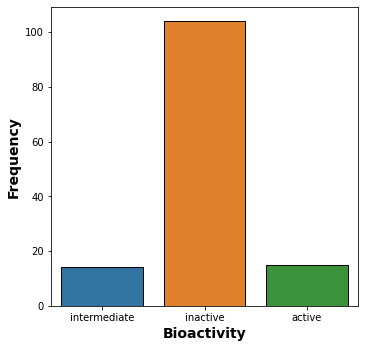

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='activity', data=corona_data, edgecolor='black')

plt.xlabel('Bioactivity', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

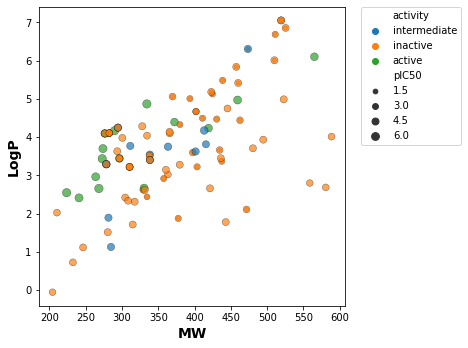

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=corona_data, hue='activity', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Text(0, 0.5, 'pIC50 value')

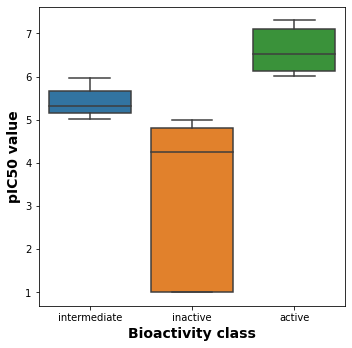

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = 'pIC50', data = corona_data)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

Text(0, 0.5, 'MW')

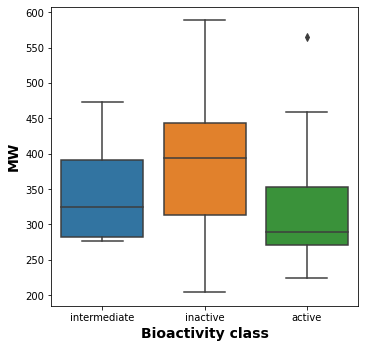

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = 'MW', data = corona_data)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

Text(0, 0.5, 'LogP')

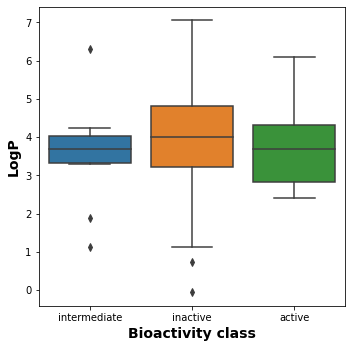

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = 'LogP', data = corona_data)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

Text(0, 0.5, 'NumHDonors')

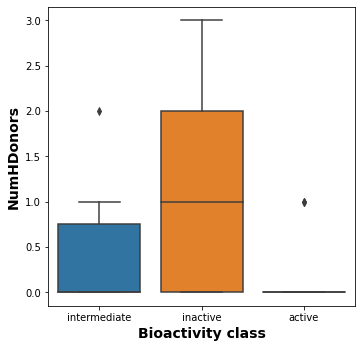

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = 'NumHDonors', data = corona_data)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

Text(0, 0.5, 'NumHAcceptors')

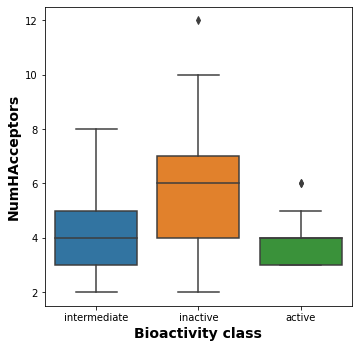

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'activity', y = 'NumHAcceptors', data = corona_data)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

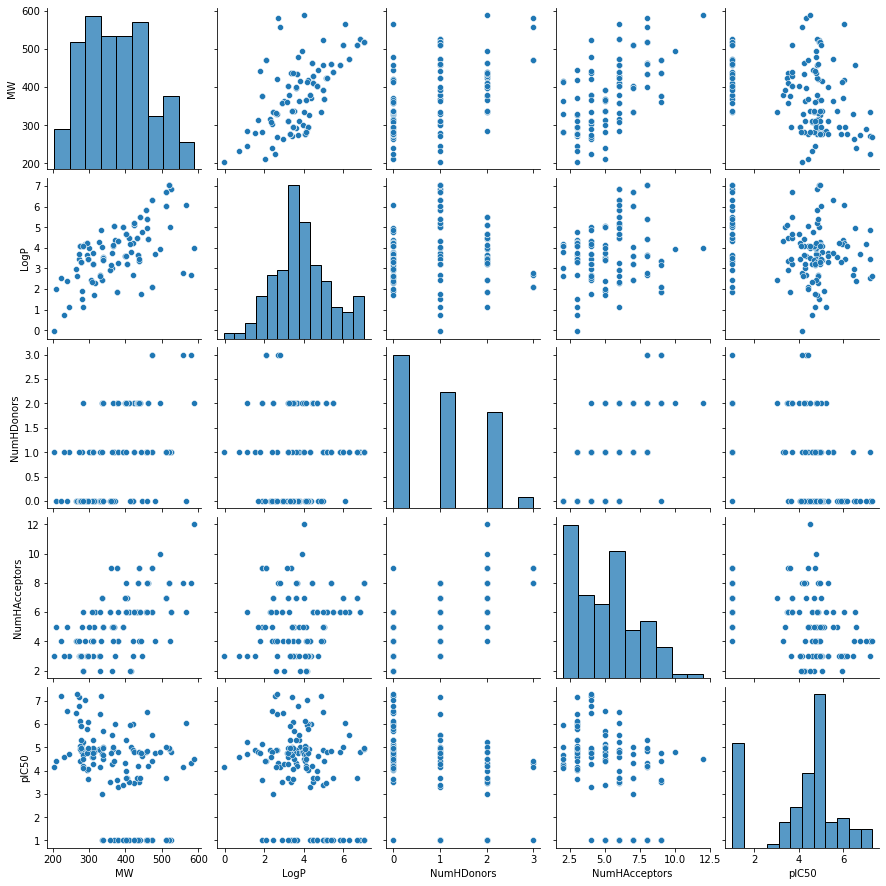

In [ ]:
sns.pairplot(data=corona_data)
plt.show()

## Export Data

In [ ]:
corona_data.to_csv("corona_processed.csv", index=False)